## 1) Let's start by getting a feel for the time-series data.

In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [15]:
#Importing E-mini S&P 500 Index for Jan 1 2017 - Feb 26 2020
df = pd.read_csv('ES-2017-Feb2020.csv')

In [16]:
display('Null Values Count', df.isnull().sum())
display('Shape', df.shape)
display('Info', df.info)
display('Data', df)

'Null Values Count'

Date       1
Time       1
Inc Vol    1
Volume     1
Open       1
High       1
Low        1
Close      1
dtype: int64

'Shape'

(276089, 8)

'Info'

<bound method DataFrame.info of               Date      Time   Inc Vol     Volume     Open     High      Low  \
0       2020-02-26  16:02:00  107909.0  3716471.0  3119.00  3120.25  3110.25   
1       2020-02-26  15:58:00   31234.0  3608510.0  3122.00  3124.50  3117.50   
2       2020-02-26  15:54:00   31973.0  3577246.0  3121.00  3126.00  3119.00   
3       2020-02-26  15:50:00   23191.0  3545217.0  3122.00  3124.50  3119.50   
4       2020-02-26  15:46:00   19763.0  3521998.0  3121.75  3125.00  3119.50   
...            ...       ...       ...        ...      ...      ...      ...   
276084  2017-01-02  18:18:00     528.0     9405.0  2243.25  2244.25  2243.25   
276085  2017-01-02  18:14:00     655.0     8877.0  2242.75  2243.50  2242.50   
276086  2017-01-02  18:10:00    1485.0     8221.0  2244.00  2244.00  2242.50   
276087  2017-01-02  18:06:00    6735.0     6736.0  2240.75  2245.00  2240.75   
276088         NaN       NaN       NaN        NaN      NaN      NaN      NaN   

       

'Data'

,Date,Time,Inc Vol,Volume,Open,High,Low,Close
0,2020-02-26,16:02:00,107909.0,3716471.0,3119.00,3120.25,3110.25,3111.50
1,2020-02-26,15:58:00,31234.0,3608510.0,3122.00,3124.50,3117.50,3119.00
2,2020-02-26,15:54:00,31973.0,3577246.0,3121.00,3126.00,3119.00,3122.25
3,2020-02-26,15:50:00,23191.0,3545217.0,3122.00,3124.50,3119.50,3121.00
4,2020-02-26,15:46:00,19763.0,3521998.0,3121.75,3125.00,3119.50,3122.00
...,...,...,...,...,...,...,...,...
276084,2017-01-02,18:18:00,528.0,9405.0,2243.25,2244.25,2243.25,2244.25
276085,2017-01-02,18:14:00,655.0,8877.0,2242.75,2243.50,2242.50,2243.25
276086,2017-01-02,18:10:00,1485.0,8221.0,2244.00,2244.00,2242.50,2242.75
276087,2017-01-02,18:06:00,6735.0,6736.0,2240.75,2245.00,2240.75,2243.75


## 2) Data Cleaning

In [17]:
#Dropping that last row which is all nulls.
df = df.dropna()

Really would prefer a DateTime Object for our Index, cause our data is plotting backwards.

In [18]:
#Making a Datetime object column, which contains both date & time info
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [19]:
#Making the DateTime Column into the index to always plot against. 
df.index = df['DateTime']

In [20]:
#dropping these redundant columns
df = df.drop(['DateTime','Date', 'Time'], axis=1)

In [21]:
df

,Inc Vol,Volume,Open,High,Low,Close
DateTime,,,,,,
2020-02-26 16:02:00,107909.0,3716471.0,3119.00,3120.25,3110.25,3111.50
2020-02-26 15:58:00,31234.0,3608510.0,3122.00,3124.50,3117.50,3119.00
2020-02-26 15:54:00,31973.0,3577246.0,3121.00,3126.00,3119.00,3122.25
2020-02-26 15:50:00,23191.0,3545217.0,3122.00,3124.50,3119.50,3121.00
2020-02-26 15:46:00,19763.0,3521998.0,3121.75,3125.00,3119.50,3122.00
...,...,...,...,...,...,...
2017-01-02 18:22:00,1073.0,10478.0,2244.25,2244.75,2244.25,2244.50
2017-01-02 18:18:00,528.0,9405.0,2243.25,2244.25,2243.25,2244.25
2017-01-02 18:14:00,655.0,8877.0,2242.75,2243.50,2242.50,2243.25


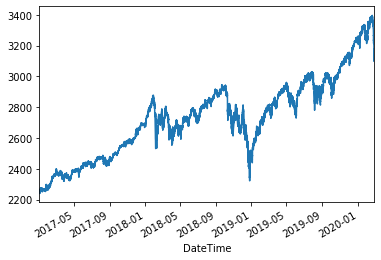

In [22]:
#Plot Closing price over time
df['Close'].plot()

This basic stock data is now looking pretty good. Let's save our changes as a new csv file. 

In [23]:
df.to_csv('data.csv', index_label='DateTime')

## 3) Feature Engineering - Lag Times

Feature Enegineering in this case will involve adding additional columns to help predict the price. Let's start with adding some lag times.

### Yesterday's High & Low
First, let's pull in the file we just made and make sure that's working as expected. 

In [24]:
# Import data without the Datetime as the Index 
df = pd.read_csv('data.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276088 entries, 0 to 276087
Data columns (total 7 columns):
DateTime    276088 non-null datetime64[ns]
Inc Vol     276088 non-null float64
Volume      276088 non-null float64
Open        276088 non-null float64
High        276088 non-null float64
Low         276088 non-null float64
Close       276088 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.7 MB


In [25]:
#Duplicate DateTime Column 
# Turning it back into the index. 
df.index = df['DateTime']

In [26]:
#This needs the DATETIME INDEX COLUMN TO WORK!!
#Making a dataframe for the Highs & Lows of each day
Daily_High = df.groupby(pd.Grouper(freq='D'))['High'].max()
Daily_High = Daily_High.to_frame()
Daily_Low = df.groupby(pd.Grouper(freq='D'))['Low'].min()
Daily_Low = Daily_Low.to_frame()

In [27]:
#Creating a DateTime Column for Daily_High table
Daily_High['DateTime']= Daily_High.index
Daily_Low['DateTime']= Daily_Low.index

In [28]:
Daily_High = Daily_High.dropna()
Daily_Low = Daily_Low.dropna()

In [29]:
#Creating a Yesterday's DateTime Column for Daily_High table
Daily_High['YHigh'] = Daily_High['High'].shift(1)
Daily_Low['YLow'] = Daily_Low['Low'].shift(1)

In [30]:
#Dictionaries to map these values into the main df
YHigh_Dict = Daily_High.to_dict()['YHigh']
YLow_Dict = Daily_Low.to_dict()['YLow']

In [31]:
#Creating a Date only Column in the main df for our mapping
df['Date'] = pd.to_datetime(df['DateTime'].dt.date)

In [32]:
#Maps the values from the Yesterdays High/Low tables to the Date Column
df["YHigh"] = df["Date"].map(YHigh_Dict) 
df["YLow"] = df["Date"].map(YLow_Dict) 

In [33]:
df.head()

,DateTime,Inc Vol,Volume,Open,High,Low,Close,Date,YHigh,YLow
DateTime,,,,,,,,,,
2020-02-26 16:02:00,2020-02-26 16:02:00,107909.0,3716471.0,3119.00,3120.25,3110.25,3111.50,2020-02-26,3258.0,3117.25
2020-02-26 15:58:00,2020-02-26 15:58:00,31234.0,3608510.0,3122.00,3124.50,3117.50,3119.00,2020-02-26,3258.0,3117.25
2020-02-26 15:54:00,2020-02-26 15:54:00,31973.0,3577246.0,3121.00,3126.00,3119.00,3122.25,2020-02-26,3258.0,3117.25
2020-02-26 15:50:00,2020-02-26 15:50:00,23191.0,3545217.0,3122.00,3124.50,3119.50,3121.00,2020-02-26,3258.0,3117.25
2020-02-26 15:46:00,2020-02-26 15:46:00,19763.0,3521998.0,3121.75,3125.00,3119.50,3122.00,2020-02-26,3258.0,3117.25


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276088 entries, 2020-02-26 16:02:00 to 2017-01-02 18:06:00
Data columns (total 10 columns):
DateTime    276088 non-null datetime64[ns]
Inc Vol     276088 non-null float64
Volume      276088 non-null float64
Open        276088 non-null float64
High        276088 non-null float64
Low         276088 non-null float64
Close       276088 non-null float64
Date        276088 non-null datetime64[ns]
YHigh       275999 non-null float64
YLow        275999 non-null float64
dtypes: datetime64[ns](2), float64(8)
memory usage: 23.2 MB


In [35]:
#Drop extra columns that I added for this
df = df.drop(['DateTime','Date'], axis=1)


### 4, 12, 24, 36 Minute Lags (High, Low, Close)

In [36]:
# Lag times from current bar to the previous 1,3,6,9 bars
df['LagC1B'] = df['Close'].diff(-1)
df['LagC3B'] = df['Close'].diff(-3)
df['LagC6B'] = df['Close'].diff(-6)
df['LagC9B'] = df['Close'].diff(-9)
df['LagH1B'] = df['High'].diff(-1)
df['LagH3B'] = df['High'].diff(-3)
df['LagH6B'] = df['High'].diff(-6)
df['LagH9B'] = df['High'].diff(-9)
df['LagL1B'] = df['Low'].diff(-1)
df['LagL3B'] = df['Low'].diff(-3)
df['LagL6B'] = df['Low'].diff(-6)
df['LagL9B'] = df['Low'].diff(-9)

In [37]:
#The first few rows don't have preceeding rows, so drop NaNs
df = df.dropna()

In [38]:
df.head()

,Inc Vol,Volume,Open,High,Low,Close,YHigh,YLow,LagC1B,LagC3B,LagC6B,LagC9B,LagH1B,LagH3B,LagH6B,LagH9B,LagL1B,LagL3B,LagL6B,LagL9B
DateTime,,,,,,,,,,,,,,,,,,,,
2020-02-26 16:02:00,107909.0,3716471.0,3119.00,3120.25,3110.25,3111.50,3258.0,3117.25,-7.50,-9.50,-9.00,-8.75,-4.25,-4.25,-4.25,-6.50,-7.25,-9.25,-6.50,-9.00
2020-02-26 15:58:00,31234.0,3608510.0,3122.00,3124.50,3117.50,3119.00,3258.0,3117.25,-3.25,-3.00,-0.25,-5.75,-1.50,-0.50,-1.25,-10.50,-1.50,-2.00,-0.50,-6.25
2020-02-26 15:54:00,31973.0,3577246.0,3121.00,3126.00,3119.00,3122.25,3258.0,3117.25,1.25,0.50,0.75,-9.75,1.50,0.00,3.25,-7.25,-0.50,0.00,2.50,-4.75
2020-02-26 15:50:00,23191.0,3545217.0,3122.00,3124.50,3119.50,3121.00,3258.0,3117.25,-1.00,0.50,0.75,-5.25,-0.50,0.00,-2.25,-4.75,0.00,2.75,0.25,-0.25
2020-02-26 15:46:00,19763.0,3521998.0,3121.75,3125.00,3119.50,3122.00,3258.0,3117.25,0.25,2.75,-2.75,-0.25,-1.00,-0.75,-10.00,2.75,0.50,1.50,-4.25,5.00
